# Boston Housing dataset    

MY Tableau Story: https://public.tableau.com/profile/olga.bradford#!/vizhome/BostonHousingPrediction_updated/main_story


Data is from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
Tableau Story for this data exploration and house data prediction could be found on:



## Variables
There are 14 attributes in each case of the dataset. They are: <br>
CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per 10.000 dollars <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - % lower status of the population<br>
MEDV - Median value of owner-occupied homes in 1000's dollars<br>

## Project: Predicting Boston Housing Prices

This project was performed as part of Machine Learning Nanodegree from Udacity.

Project planning:

1. Preprocessing and Data exploration

2. Feature selection (cross-corelation, SelectKBest)

3. Best Algorithms selection (KNN, GBM, Random Forest)

4. Algorithm 1: Tuning K-Nearest Neighbors(KNN) on scaled data

5. Algorithm 2: Tuning GBM on scaled data

6. Algorithm 3: Tuning Decision tree



## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value (MEDV in dataset). This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:






## 1. Preprocessing



In [1]:
# Import libraries necessary for this project
import numpy as np
from numpy import arange
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('boston_test.csv')



In [2]:
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
#add index
data['index']=range(1,len(data)+1)
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,index
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3


In [4]:
prices = data['medv']
features = data.drop('medv', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 15 variables each.


In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,index
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,253.500000
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,146.213884
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,127.250000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,253.500000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,379.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,506.000000


## Data Exploration
Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, I will need to separate the dataset into features and the target variable. The features, 'RM', 'LSTAT',  'PTRATIO' and others, give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.
## Calculate Descriptive Statistics
Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in prices.
Store each calculation in their respective variable.



In [6]:
# Minimum price of the data
minimum_price = np.min(prices)
# Maximum price of the data
maximum_price = np.max(prices)

# mean price of the data
mean_price = np.mean(prices)

#Median price of the data
median_price = np.median(prices)

#Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


## 2. Feature selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.


Lets have a look at data distribution: MEDV vs other features:

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

A home with higher 'RM' value(number of rooms) should have higher price than a home with lower 'RM' value assuming that all of the other features are similar. The reason is it has more value, which is space and functionality.
Based on experience, the home prices in neighborhood with higher 'LSTAT' value(percent of lower class workers) will be lower than in neighborhood with lower 'LSTAT' value. The reason is more likely due to supply and demand balance. The demand is related with the buying power (income, asset, etc) of the community.

For Boston dataset, we can evaluate by plotting price vs each feature.


In [7]:
graph1 = data[['rm','lstat','age','medv']]
graph1.head(3)

,rm,lstat,age,medv
0,6.575,4.98,65.2,24.0
1,6.421,9.14,78.9,21.6
2,7.185,4.03,61.1,34.7


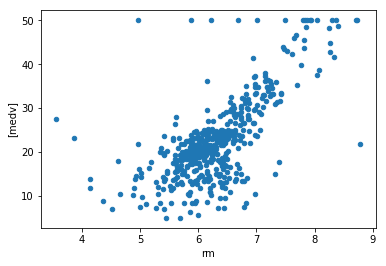

In [8]:
import matplotlib.pyplot as plt
graph1.plot.scatter(x='rm', y=['medv'])
plt.show()

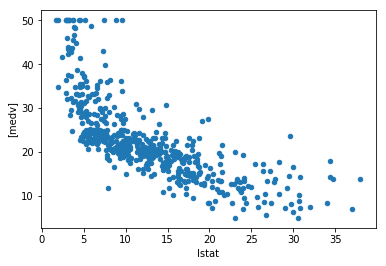

In [9]:
graph1.plot.scatter(x='lstat', y=['medv'])
plt.show()

## Correlation - choosing best features
I have 13 possible feature columns I can use to train my model. One thing to be aware of as I start to add more features is a concept called collinearity. Collinearity occurs where more than one feature contains data that are similar. The effect of collinearity is that my model will overfit - I may get great results on my test data set, but then the model performs worse on unseen data.

In [10]:
data.columns.values

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv', 'index'], dtype=object)

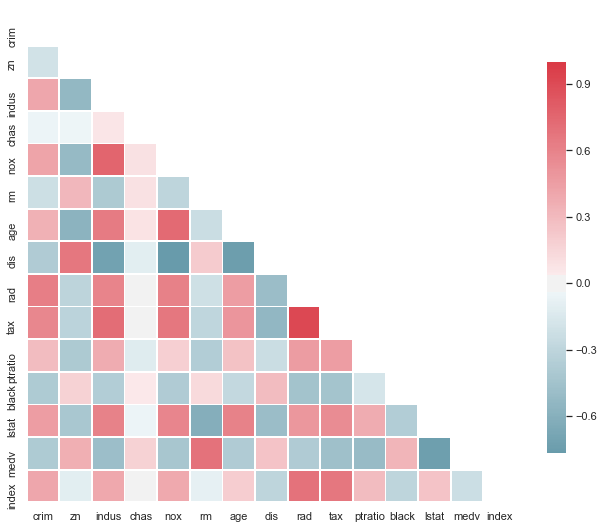

In [11]:
import seaborn as sns

corr = data.corr()
    
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .8})
plt.show()

columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv']

In [12]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,index
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.407407
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.103393
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.399439
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.003759
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.398736
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.079971
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.203784
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.302211
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.686002
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.666626


highest cross-correlation values: <br>
medv Median value of owner-occupied homes in 1000's dollars<br>
<br>
medv<>lstat -0.73  % lower status of the population<br>
medv<>crim -0.388 per capita crime rate by town <br>
medv<>rm 0.695  average number of rooms per dwelling<br>
medv<>age -0.37 proportion of owner-occupied units built prior to 1940<br>
medv<>indus -0.48  proportion of non-retail business acres per town<br>
medv<>nox -0.42 nitric oxides concentration (parts per 10 million)<br>
medv<>rad -0.38  index of accessibility to radial highways <br>
medv<>tax -0.46 full-value property-tax rate per 10.000 dollars<br>
medv<>ptratio -0.507  pupil-teacher ratio by town <br>

## SelectKBest for feature selection on all dataset

Confirming results of cross-correlation with SelectKBest (should be the same)

SelectKBest selects the top k features that have maximum relevance with the target variable. It takes two parameters as input arguments, "k" (obviously) and the score function to rate the relevance of every feature with the target variable. 

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  #for regression

#F-value between label/feature for regression tasks.
skb = SelectKBest(f_regression,k='all').fit(features,data['medv'])
scores = skb.scores_
all_features = features.columns.values
sort_index = np.argsort(scores)[::-1]
rank = 1
ranked_features = []
print ("Ranking of features is ")
for x in sort_index:
    print (rank,". Score  ",all_features[x]," is ",scores[x])
    ranked_features.append(all_features[x])
    rank += 1
print (all_features)

Ranking of features is 
1 . Score   lstat  is  601.6178711099022
2 . Score   rm  is  471.84673987638644
3 . Score   ptratio  is  175.1055428757603
4 . Score   indus  is  153.95488313610974
5 . Score   tax  is  141.76135657742412
6 . Score   nox  is  112.59148027970087
7 . Score   crim  is  89.48611475768125
8 . Score   rad  is  85.91427766984089
9 . Score   age  is  83.47745921923676
10 . Score   zn  is  75.25764229895405
11 . Score   black  is  63.054229112492976
12 . Score   dis  is  33.57957032590496
13 . Score   index  is  27.280852595717363
14 . Score   chas  is  15.971512420371932
['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'black' 'lstat' 'index']


In [14]:
features_3 = ranked_features[:3]
print ("Features in 1st set are ",features_3)

Features in 1st set are  ['lstat', 'rm', 'ptratio']


highest cross-correlation values on all dataset: 
medv Median value of owner-occupied homes in 1000's dollars

1. medv*lstat -0.73  % lower status of the population
2. medv*rm 0.695  average number of rooms per dwelling
3. medv*ptratio -0.507  pupil-teacher ratio by town 
4. medv*indus -0.48  proportion of non-retail business acres per town
5. medv*tax -0.46 full-value property-tax rate per 10.000 dollars
6. medv*nox -0.42 nitric oxides concentration (parts per 10 million)
7. medv*crim -0.388 per capita crime rate by town 
8. medv*rad -0.38  index of accessibility to radial highways 
9. medv*age -0.37 proportion of owner-occupied units built prior to 1940

Top 9 Ranking from SelectKBest <br>
1 . Score   lstat  is  601.6178711099022 <br>
2 . Score   rm  is  471.84673987638644 <br>
3 . Score   ptratio  is  175.1055428757603<br>
4 . Score   indus  is  153.95488313610974<br>
5 . Score   tax  is  141.76135657742412<br>
6 . Score   nox  is  112.59148027970087<br>
7 . Score   crim  is  89.48611475768125<br>
8 . Score   rad  is  85.91427766984089<br>
9 . Score   age  is  83.47745921923676<br>



## Comparing feature selection results on train/test split datasets

To avoid overfitting on validation dataset, features for model building should be selected based on cross correlation of train dataset.

In [15]:
from sklearn.model_selection import train_test_split 

# Split-out validation dataset 50% / 50%

seed = 40
X_train, X_validation, Y_train, Y_validation = train_test_split(data, prices, test_size=0.5, random_state = seed)


X_train.head(2)




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,index
46,0.18836,0.0,6.91,0,0.448,5.786,33.3,5.1004,3,233,17.9,396.90,14.15,20.0,47
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2,489


In [16]:
X_validation.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,index
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7,359
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3,198


In [17]:
X_train.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,index
crim,1.000000,-0.228599,0.451376,-0.056339,0.523678,-0.289786,0.373230,-0.416614,0.750554,0.675379,0.317094,-0.479736,0.521471,-0.446383,0.471320
zn,-0.228599,1.000000,-0.529071,-0.009209,-0.498301,0.307768,-0.564650,0.702119,-0.287780,-0.294656,-0.377418,0.188083,-0.421250,0.371208,-0.066438
indus,0.451376,-0.529071,1.000000,0.018858,0.746651,-0.428567,0.627784,-0.688636,0.541554,0.693379,0.372513,-0.382977,0.609485,-0.560529,0.390409
chas,-0.056339,-0.009209,0.018858,1.000000,0.037048,0.140301,0.048000,-0.070841,0.010122,-0.051405,-0.119943,0.043253,-0.079892,0.229924,0.005258
nox,0.523678,-0.498301,0.746651,0.037048,1.000000,-0.259978,0.717308,-0.756721,0.635899,0.677699,0.208823,-0.470429,0.567892,-0.469790,0.424948
rm,-0.289786,0.307768,-0.428567,0.140301,-0.259978,1.000000,-0.245882,0.173596,-0.175223,-0.282127,-0.329359,0.176075,-0.627089,0.686916,-0.073274
age,0.373230,-0.564650,0.627784,0.048000,0.717308,-0.245882,1.000000,-0.723708,0.425128,0.465728,0.269800,-0.277530,0.595005,-0.431646,0.190501
dis,-0.416614,0.702119,-0.688636,-0.070841,-0.756721,0.173596,-0.723708,1.000000,-0.460596,-0.492030,-0.225419,0.305813,-0.474242,0.279931,-0.261754
rad,0.750554,-0.287780,0.541554,0.010122,0.635899,-0.175223,0.425128,-0.460596,1.000000,0.879336,0.419824,-0.494857,0.462906,-0.395412,0.639049
tax,0.675379,-0.294656,0.693379,-0.051405,0.677699,-0.282127,0.465728,-0.492030,0.879336,1.000000,0.439239,-0.478578,0.518645,-0.507521,0.660388


In [18]:
X_validation.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,index
crim,1.000000,-0.197322,0.409378,-0.059750,0.379677,-0.193401,0.359631,-0.380406,0.584009,0.562138,0.298079,-0.368809,0.438809,-0.382502,0.400750
zn,-0.197322,1.000000,-0.540976,-0.072713,-0.536206,0.315605,-0.573066,0.633788,-0.336155,-0.333835,-0.401882,0.162630,-0.406749,0.351912,-0.135685
indus,0.409378,-0.540976,1.000000,0.107725,0.784689,-0.366885,0.663979,-0.729287,0.651060,0.749633,0.397710,-0.327822,0.604924,-0.427513,0.409251
chas,-0.059750,-0.072713,0.107725,1.000000,0.139931,0.053483,0.121054,-0.127129,-0.024373,-0.020667,-0.122748,0.054415,-0.032599,0.132884,-0.012038
nox,0.379677,-0.536206,0.784689,0.139931,1.000000,-0.337359,0.748030,-0.782724,0.587979,0.659928,0.182121,-0.296167,0.613136,-0.407626,0.379563
rm,-0.193401,0.315605,-0.366885,0.053483,-0.337359,1.000000,-0.236483,0.234713,-0.239489,-0.303092,-0.374491,0.087027,-0.604993,0.702971,-0.085415
age,0.359631,-0.573066,0.663979,0.121054,0.748030,-0.236483,1.000000,-0.774793,0.486353,0.544688,0.253161,-0.271052,0.608407,-0.336254,0.215104
dis,-0.380406,0.633788,-0.729287,-0.127129,-0.782724,0.234713,-0.774793,1.000000,-0.527503,-0.576978,-0.245451,0.279551,-0.521830,0.233082,-0.345858
rad,0.584009,-0.336155,0.651060,-0.024373,0.587979,-0.239489,0.486353,-0.527503,1.000000,0.940211,0.513998,-0.400439,0.513454,-0.382788,0.736657
tax,0.562138,-0.333835,0.749633,-0.020667,0.659928,-0.303092,0.544688,-0.576978,0.940211,1.000000,0.486271,-0.406254,0.568570,-0.446070,0.674783


It is expected that cross-correlations of all dataset, train, and validation datasets will be different. In order to avoid overfitting, I will choose features based on the cross-correlation coefficients of the train dataset, and will use the same seed for train/test split in data modeling.
<br>
1. medv*lstat -0.73  % lower status of the population <br>
2. medv*rm 0.695  average number of rooms per dwelling <br>
3. medv*ptratio -0.507  pupil-teacher ratio by town <br>
4. medv*indus -0.48  proportion of non-retail business acres per town <br>
5. medv*tax -0.46 full-value property-tax rate per 10.000 dollars <br>
6. medv*nox -0.42 nitric oxides concentration (parts per 10 million) <br>
7. medv*crim -0.388 per capita crime rate by town <br>
8. medv*rad -0.38  index of accessibility to radial highways <br>
9. medv*age -0.37 proportion of owner-occupied units built prior to 1940 <br>
<br>



Coefficients in order of train dataset<br>
 medv*lstat -0.73  % lower status of the population <br>
 medv*rm 0.689  average number of rooms per dwelling <br>
 medv*indus -0.56  proportion of non-retail business acres per town<br>
 medv*nox -0.507 nitric oxides concentration (parts per 10 million)<br>
 medv*ptratio -0.502  pupil-teacher ratio by town <br>
 medv*tax -0.46 full-value property-tax rate per 10.000 dollars <br>
 medv*crim -0.446 per capita crime rate by town <br>
 medv*age -0.43 proportion of owner-occupied units built prior to 1940<br>
 medv*rad -0.39  index of accessibility to radial highways <br>

Based on these differences in order and the order itself, I will choose for the first test
following features:
<br>
lstat <br>
rm <br>
indus<br>
nox<br>




## Data visualizations

Some features are exponential, some are modal.


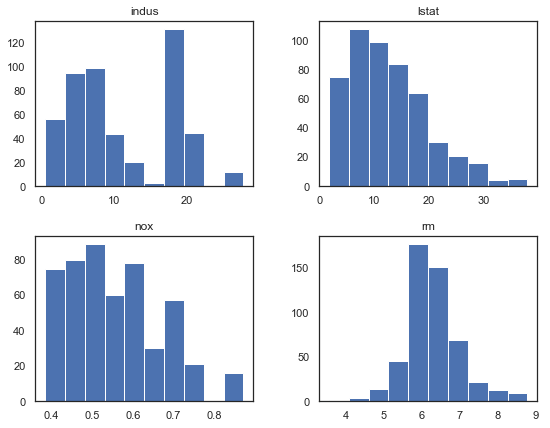

In [127]:
# histograms
features4 = data[['rm','lstat','indus','nox']]
features4.hist(bins=10,figsize=(9,7),grid=False);

2 Features are normally distributed (rm and lstat), however indus and nox are not normally distributed.
Will try to apply StandardScaler for a choice of an algorithm anyway.


C:\Users\dave_\Anaconda3_2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


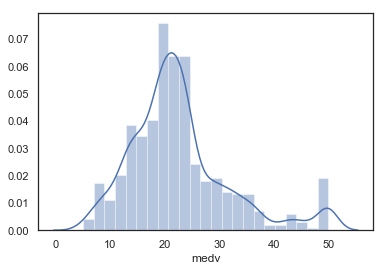

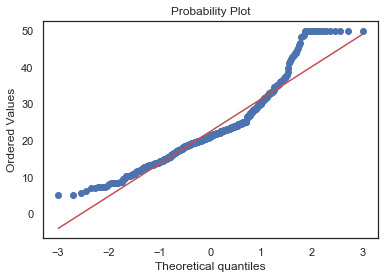

In [128]:
#histogram
from scipy import stats
sns.distplot(data['medv']);


fig=plt.figure()
res=stats.probplot(data['medv'], plot=plt)

It shows 'peakedness', positive skewness and does not follow the diagonal line. A simple data transformation can solve the problem. Will do in by standardizing the data

## Data Preprocessing



## Developing a Model
<br>


## Implementation: Define a Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, I will be calculating the coefficient of determination, R2, to quantify my model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

For the performance_metric function in the code cell below, I will need to implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.
Assign the performance score to the score variable.

In [129]:
#Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

## Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
Split the data into 80% training and 20% testing.
Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
Assign the train and testing splits to X_train, X_test, y_train, and y_test.



In the first test I split data 20% train set - 80% test set
Accuracy of prediction is higher on test set! That rarely could be the case, but it happens on all 3 algorithms that were tuned in.
So, In next run, I want to compare results if data will be split 50% / 50%


In [130]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split 

features = data[['rm','lstat','indus','nox']]

# Split-out validation dataset

seed = 40
X_train, X_validation, Y_train, Y_validation = train_test_split(features, prices, test_size=0.5, random_state = seed)


In [131]:
# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))



results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -25.813600 (13.783132)
LASSO: -29.309775 (13.901203)
EN: -28.878706 (13.702165)
KNN: -23.323371 (10.815635)


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest

RF: -18.721199 (11.915932)
DT: -26.345225 (13.882808)
SVR: -38.105163 (17.440466)


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:196: Fut

## Compare algorithms

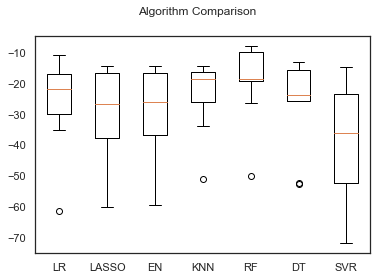

In [132]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

For Tree methods like Decision Tree and Random Forest feature scaling is not needed, therefore, it is obvious why these two methods work best on non-scaled data in comparison with other methods where scaling is essential. So, next step is to apply standardscaler() to data and check how others algorithms would perform.

## Standardize the dataset with StandardScaler()
Standartization is a common requirement for many machine learning estimators, as they might behave bad;y if the individual features do not more of less look like standard normally distributed data.

Here, we will use StandardScaler(), as 2 out of 4 features are normally distrubuted.
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.


In [133]:
pipelines = []
pipelines.append(('ScLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScLR: -25.813600 (13.783132)
ScLASSO: -27.107121 (13.247252)
ScEN: -28.166034 (14.322652)
ScKNN: -19.124115 (11.794934)
ScDT: -28.236786 (14.009911)
ScSVR: -22.586194 (12.636752)
ScRF: -18.463560 (11.487055)


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest

SO, 3 of the best algorothms are KNN, Decision Tree and RandomForest

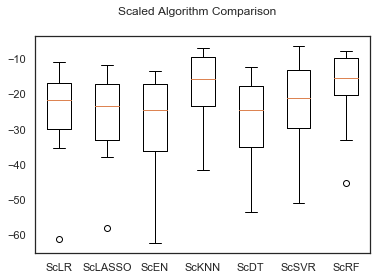

In [134]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

KNN on scaled data performs better than other algorithms.


## Ensembles
Comparing Scaler+KNN with boosting algorithms like AdaBooster, Gradient Boosting, RandomForest (best without scaling), and ExtraTreeRegressor.



In [135]:
ensembles = []
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


ScaledKNN: -19.124115 (11.794934)
ScaledAB: -22.738470 (11.997434)
ScaledGBM: -18.172726 (11.267602)
ScaledRF: -20.404779 (10.156085)


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest

ScaledET: -17.633103 (10.243810)


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest

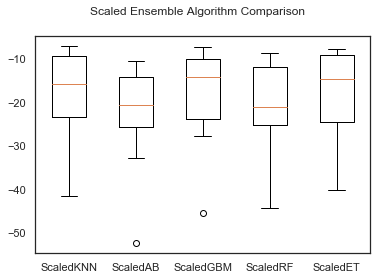

In [136]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

So, it is pretty clear that GBM is better than KNN.
And tree based algorithms perfored better on unscalled data.

So,  will tune KNN, GBM and DecisionTree and than choose where I can achieve better results.


## Tuning KNN (K - Nearest Neighbors)

In [30]:
prices.head(3)

0    24.0
1    21.6
2    34.7
Name: medv, dtype: float64

In [74]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split 

features4 = data[['rm','lstat','indus','nox']]

# Split-out validation dataset

seed = 40
X_train, X_validation, Y_train, Y_validation = train_test_split(features4, prices, test_size=0.5, random_state = seed)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_validation)
X_test = pd.DataFrame(x_test_scaled)

In [75]:
X_train.head(3)

,0,1,2,3
0,-0.785866,0.213693,-0.608059,-0.903438
1,-1.320297,0.814016,2.372840,0.539865
2,1.002544,-0.211599,-0.891409,-1.082731


In [76]:
X_test.head(3)

,0,1,2,3
0,-0.217114,-0.138630,1.040035,1.751675
1,1.048847,-0.511186,-1.428491,-1.310165
2,-1.157541,2.370605,-0.625997,-0.942075


In [77]:
Y_train.head(3)

46     20.0
488    15.2
240    22.0
Name: medv, dtype: float64

In [78]:
Y_validation.head(3)

358    22.7
197    30.3
48     14.4
Name: medv, dtype: float64

## Choosing K value for KNN values from 1 to 20

In [115]:
#import required packages
from sklearn import metrics

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error



scores = []

for k in range(30):
    
    k=k+1
    modelknn = neighbors.KNeighborsRegressor(n_neighbors = k)
    modelknn.fit(X_train, Y_train)  #fit the model
    predknn=modelknn.predict(X_test) #make prediction on test set
    error=metrics.mean_squared_error(Y_validation,predknn)
    scores.append(error) #calculate MEAN SQUARED ERROR  (RMSE)
    
    print('k=  ', k, 'score=', error)

k=   1 score= 21.918260869565216
k=   2 score= 25.345533596837942
k=   3 score= 27.769828722002625
k=   4 score= 31.473547430830042
k=   5 score= 32.98161739130435
k=   6 score= 30.070687307861224
k=   7 score= 31.545499717673632
k=   8 score= 32.47982954545454
k=   9 score= 33.3969501781096
k=   10 score= 34.58692371541502
k=   11 score= 35.34653023225427
k=   12 score= 36.57949522397892
k=   13 score= 37.384543583506805
k=   14 score= 38.20190005646527
k=   15 score= 38.369520070267896
k=   16 score= 38.91645735548419
k=   17 score= 39.4809865010873
k=   18 score= 39.75672339335383
k=   19 score= 40.37780605038704
k=   20 score= 40.731962154150196
k=   21 score= 41.41120109703961
k=   22 score= 42.004496374089435
k=   23 score= 42.28722595395892
k=   24 score= 42.899620869016246
k=   25 score= 43.36696240316206
k=   26 score= 43.763836038543396
k=   27 score= 44.220271149498195
k=   28 score= 44.56568741429378
k=   29 score= 44.89221940753762
k=   30 score= 45.18456530522617


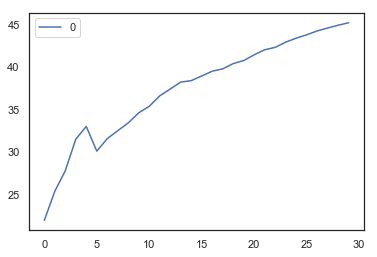

In [116]:
#plotting the rmse values against k values
curve = pd.DataFrame(scores) #elbow curve 
curve.plot()

I can safely say that k=6 will give us the best result in this case.

These are the predictions using training dataset. Let us now predict the values for test dataset and make a submission.


## Predictions on the test dataset with k=6 on train set

In [114]:
#predicting on the test set and creating submission file
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(features4, prices, test_size=0.5, random_state = 40)

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)

modelknn = neighbors.KNeighborsRegressor(n_neighbors = 3)
modelknn.fit(rescaledX, Y_train) 

#transform the validation dataset
scaler2=StandardScaler().fit(X_test)
rescaledTestX = scaler2.transform(X_test)
predictionsknn=modelknn.predict(rescaledTestX )


print(mean_squared_error(Y_test,predictionsknn))

26.562621870882737


In [117]:
#KNN accuracy score
modelknn.fit(rescaledX,Y_train)   
print("R-Squared on train dataset={}".format(modelknn.score(rescaledX,Y_train)))

modelknn.fit(rescaledTestX,Y_test)   
print("R-Squared on test dataset={}".format(modelknn.score(rescaledTestX,Y_test)))

R-Squared on train dataset=0.7110542012113122
R-Squared on test dataset=0.7357757639294387


In [118]:
predictionsknn=predictionsknn.astype(int)
submission = pd.DataFrame({
        "Org House Price": Y_test,
        "Pred House Price KNN": predictionsknn
    })

#submission.head(2)
#submission.to_csv("PredictedPriceKNN.csv", index=False)

In [119]:
#merge 2 dataframes
#X_test and submission
#X_test.head(2)
bigdataKNN = pd.concat([X_test, submission], axis=1)
#bigdataKNN.head(2)
#add index
bigdataKNN['index']=range(1,len(bigdataKNN)+1)

bigdataKNN.head(5)
bigdataKNN.to_csv("PredictedPriceKNN.csv", index=False)
#bigdataKNN.to_csv("PredictedPriceKNN.csv", index=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


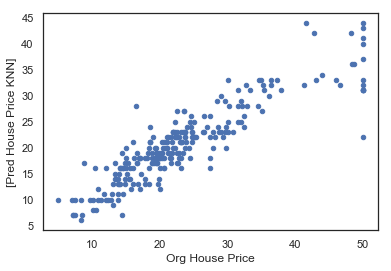

In [120]:
submission.plot.scatter(x='Org House Price', y=['Pred House Price KNN'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


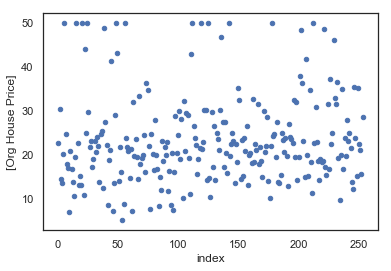

In [121]:
bigdataKNN.plot.scatter(x='index', y=['Org House Price'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


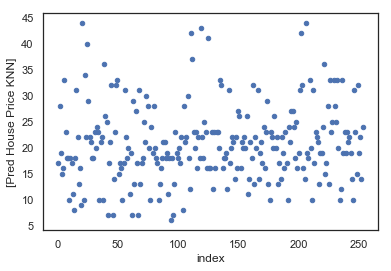

In [122]:
bigdataKNN.plot.scatter(x='index', y=['Pred House Price KNN'])
plt.show()

## Tune scaled GBM



In [123]:
import numpy
#split to train/test 50% each
seed=40
X_train, X_validation, Y_train, Y_validation = train_test_split(features4, prices, test_size=0.5, random_state = seed)


scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([20,50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.186889 using {'n_estimators': 50}
-19.721677 (9.682700) with: {'n_estimators': 20}
-18.186889 (10.439639) with: {'n_estimators': 50}
-18.270110 (11.123636) with: {'n_estimators': 100}
-18.716156 (11.839042) with: {'n_estimators': 150}
-18.932427 (11.955640) with: {'n_estimators': 200}
-19.065582 (11.953615) with: {'n_estimators': 250}
-19.252171 (12.062372) with: {'n_estimators': 300}
-19.332908 (12.021385) with: {'n_estimators': 350}
-19.332433 (11.928743) with: {'n_estimators': 400}


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Run prediction on Validation Set 
n_estimators=50



In [124]:
# prepare the model

X_train, X_test, Y_train, Y_test = train_test_split(features4, prices, test_size=0.5, random_state = 40)

scaler=StandardScaler()
rescaledX=scaler.fit_transform(X_train)


seed=40
modelgbm = GradientBoostingRegressor(random_state=seed, n_estimators=50)
modelgbm.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledTestX=scaler.fit_transform(X_test)
predictionsgbm = modelgbm.predict(rescaledTestX)
print(mean_squared_error(Y_test, predictionsgbm))

33.48769427833641


In [125]:
#GBM accuracy score
modelgbm.fit(rescaledX,Y_train)   
print("R-Squared on train dataset={}".format(modelgbm.score(rescaledX,Y_train)))

modelgbm.fit(rescaledTestX,Y_test)   
print("R-Squared on test dataset={}".format(modelgbm.score(rescaledTestX,Y_test)))

R-Squared on train dataset=0.9335045654603698
R-Squared on test dataset=0.9601972818488523


In [126]:
predictionsgbm=predictionsgbm.astype(int)
submission_gbm = pd.DataFrame({
        "Org House Price": Y_test,
        "Pred House Price GBM": predictionsgbm
    })
submission_gbm.head(5)

,Org House Price,Pred House Price GBM
358,22.7,19
197,30.3,29
48,14.4,17
450,13.4,13
469,20.1,18


In [137]:
#merge 2 dataframes
#X_test and submission
#X_test.head(2)
bigdataGBM = pd.concat([X_test, submission_gbm], axis=1)
#bigdataKNN.head(2)
#add index
bigdataGBM['index']=range(1,len(bigdataGBM)+1)

bigdataGBM.head(5)
bigdataGBM.to_csv("PredictedPriceGBM.csv", index=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


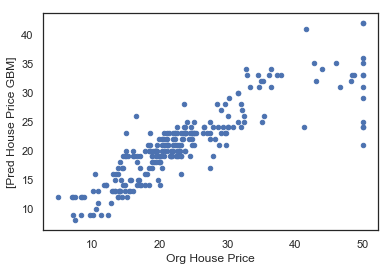

In [138]:
submission_gbm.plot.scatter(x='Org House Price', y=['Pred House Price GBM'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


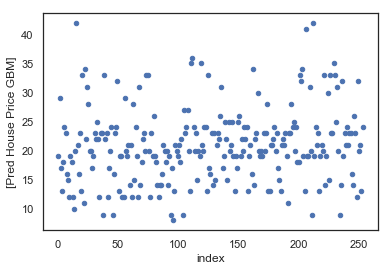

In [139]:
bigdataGBM.plot.scatter(x='index', y=['Pred House Price GBM'])
plt.show()

So, with GBM we can predict accuracy of prediction with 96%


# Tune Decision Tree

In [140]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=100)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #  Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Optimal Model for Decision Tree
What is the maximum depth does the optimal model have?



In [141]:
seed = 40
x_train, x_test, y_train, y_test = train_test_split(features4, prices, test_size=0.5, random_state = seed)
# Fit the training data to the model using grid search
reg = fit_model(x_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 2 for the optimal model.


In [142]:
from sklearn import metrics #metrics module for accuracy calculations
dtm1 = DecisionTreeRegressor(max_depth=2,
                           min_samples_split=5,
                           max_leaf_nodes=10)
dtm2 = DecisionTreeRegressor(max_depth=3,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm1.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm1.score(x_train,y_train)))

dtm2.fit(x_test,y_test)   
print("R-Squared on test dataset={}".format(dtm2.score(x_test,y_test)))

R-Squared on train dataset=0.7806313805842142
R-Squared on test dataset=0.8972386145747178


So, prediction error is about 10% on average. Run decision tree for all dataset and add decision tree predictor to a dataframe:

In [143]:
predictions_dectree = dtm2.predict(x_test)
print(mean_squared_error(y_test,predictions_dectree))
#print(predictions_dectree)

10.332803156999534


In [144]:
predictionsdt=predictions_dectree.astype(int)
submission_dt = pd.DataFrame({
        "Org House Price": y_test,
        "Pred House Price dt": predictions_dectree
    })
submission_dt.head(5)

,Org House Price,Pred House Price dt
358,22.7,20.176316
197,30.3,23.044000
48,14.4,17.575000
450,13.4,12.208333
469,20.1,20.176316


In [145]:
#merge 2 dataframes
#X_test and submission
#X_test.head(2)
bigdataDT = pd.concat([x_test, submission_dt], axis=1)
#bigdataKNN.head(2)
#add index
bigdataDT['index']=range(1,len(bigdataDT)+1)

bigdataDT.head(5)
bigdataDT.to_csv("PredictedPriceDT.csv", index=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


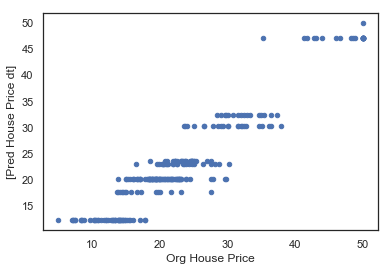

In [146]:
#plot predicted value using decisiontree vs index value
submission_dt.plot.scatter(x='Org House Price', y=['Pred House Price dt'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


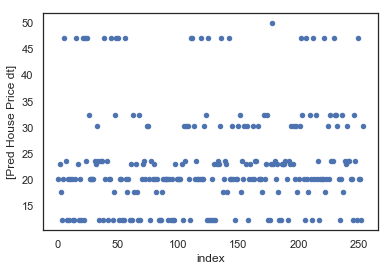

In [147]:
#plot actual value vs index value
bigdataDT.plot.scatter(x='index', y=['Pred House Price dt'])
plt.show()

## Conclusion

By far the best algorithm to predict Boston housing is GBM on scaled data (96% accuracy)